In [152]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from Reg_NeuralNet import NeuralNetwork
import os
from preprocessing import images
import pickle

In [2]:
def partitions(img, tile_size, n_tiles):
    X = []
    T = []

    for _ in range(n_tiles):
        buffer = int(tile_size/2)
        x_start = np.random.randint(buffer, img.shape[0] - (tile_size + buffer))
        y_start = np.random.randint(buffer, img.shape[1] - (tile_size + buffer))

        X.append(img[x_start:x_start + tile_size, y_start:y_start + tile_size])
        x_start_t = x_start - buffer
        y_start_t = y_start - buffer
        T.append(img[x_start_t:x_start + tile_size + buffer, y_start_t:y_start + tile_size + buffer])

    return X, T

In [2]:
data_raw = []

path = "/Users/amoore/projects/01_DATASETS/landscape_images/gray/"
_filenames = os.listdir(path)

for f in _filenames:
    im = imread(path + f)
    if im.shape[0] == 150:
        data_raw.append(im)

In [3]:
data = np.array(data_raw)

In [4]:
data.shape

(7106, 150, 150)

In [5]:
train_data = data[:100, :, :]
test_data = data[100:120, :, :]

In [6]:
Xtrain, Ttrain = images(train_data, 50, 15)

In [7]:
Xtest, Ttest = images(test_data, 50, 15)

In [9]:
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((1500, 2500), (1500, 10000), (300, 2500), (300, 10000))

In [50]:
Xtrain = []
Ttrain = []

for d in train_data:
    x, t = partitions(d, 50, 15)
    Xtrain.append(np.array([np.array(x1).flatten() for x1 in x]))
    Ttrain.append(np.array([np.array(t1).flatten() for t1 in t]))

In [51]:
Xtrain = np.array(Xtrain)
Ttrain = np.array(Ttrain)
Xtrain.shape, Ttrain.shape

((100, 15, 2500), (100, 15, 10000))

In [72]:
Xtrainf = []
Ttrainf = []

for i in range(Xtrain.shape[0]):
    x = Xtrain[i, :, :]
    t = Ttrain[i, :, :]

    for i in range(x.shape[0]):
        Xtrainf.append(x[i, :])
        Ttrainf.append(t[i, :])



In [74]:
Xtrainf = np.array(Xtrainf)
Ttrainf = np.array(Ttrainf)
Xtrainf.shape, Ttrainf.shape

((1500, 2500), (1500, 10000))

In [96]:
nn = NeuralNetwork(2500, [1000, 500, 1000], 10000)

In [139]:
nn

NeuralNetwork(2500, [1000, 500, 1000], 10000)
 Trained on a regression problem for 940 epochs with a final training MSE of 1574.

In [187]:
nn.train(Xtrain, Ttrain, 100, 0.001)

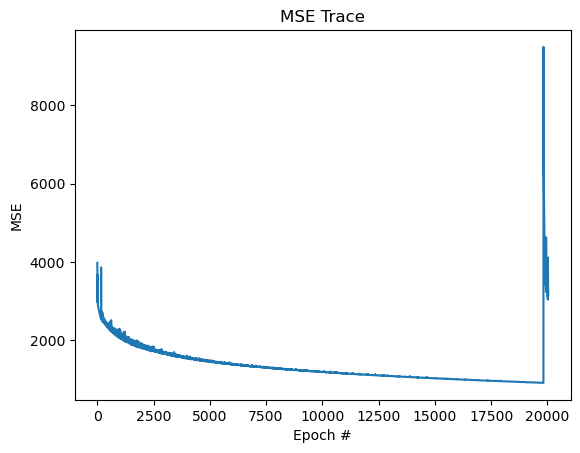

In [188]:
nn.plot_mse_trace()

In [173]:
Y = nn.use(Xtrain)

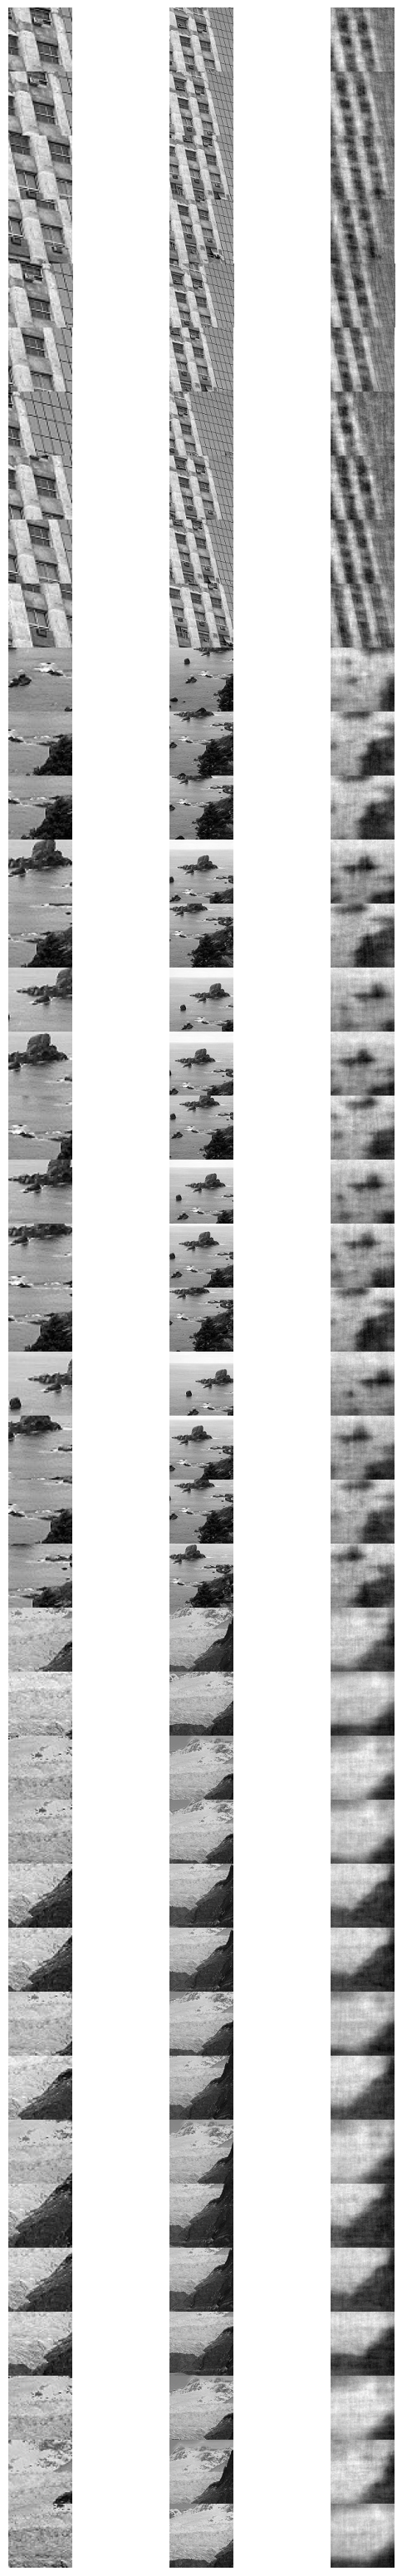

In [176]:

s = 980
n = 1020

fig, axes = plt.subplots(n - s, 3, figsize=(10, 40))
count = 0
for i in range(s, n):
    axes[count][0].imshow(Xtrain[i].reshape(50,50), cmap='gray')
    axes[count][0].axis('off')
    axes[count][1].imshow(Ttrain[i].reshape(100,100), cmap='gray')
    axes[count][1].axis('off')
    axes[count][2].imshow(Y[i].reshape(100,100), cmap='gray')
    axes[count][2].axis('off')
    count += 1




fig.subplots_adjust(wspace=-0.5 ,hspace=0)
